In [1]:
import os
import sys
import gin
import numpy as np
import pandas as pd
from IPython.core.display import clear_output, display
from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df, get_pd_line_graph, \
    apply_nodes_restrictions, apply_edge_restriction, construct_output_graph
from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

%autoreload 2

C:\Miniconda3\envs\ariadne_gpu\lib\site-packages\pytorch_lightning\utilities\distributed.py:37: UserWarning: Unsupported `ReduceOp` for distributed computing.
  warnings.warn(*args, **kwargs)


In [2]:
from prepare import parse

csv_params = {
"sep": '\s+',
"nrows": 15000,
"encoding": 'utf-8',
"names": ['event',  'x', 'y', 'z', 'station', 'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0']
}
suff_df = ('_p', '_c')
gin.bind_parameter('get_pd_line_graph.restrictions_0',(-0.2, 0.2))
gin.bind_parameter('get_pd_line_graph.restrictions_1', (-0.28, 0.28))
gin.bind_parameter('get_pd_line_graph.suffix_c', '_c')
gin.bind_parameter('get_pd_line_graph.suffix_p','_p')
gin.bind_parameter('get_supernodes_df.suffix_c', '_c')
gin.bind_parameter('get_supernodes_df.suffix_p', '_p')
gin.bind_parameter('get_supernodes_df.axes', ['r', 'phi', 'z'])
gin.bind_parameter('apply_edge_restriction.edge_restriction', 0.093)
stations_constraints = {
    0: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    1: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
    2: {'x': [-166.6, 166.6], 'y': [-166.6, 166.6], 'z': [-423.5, 423.5]},
}

In [3]:
ev_count = 1

events_count_str = f"0..{ev_count}"

events = parse("../data/new_data/1.txt",
               csv_params=csv_params, events_quantity=events_count_str,
               filter_func=lambda df: df[df.track >= -1])
events = next(events)[0]
n_events = ev_count
events_to_analyze = events[events.event < n_events]

In [4]:
events_to_analyze

,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0
0,0,-81.47063,3.708617,-117.40020,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,-81.47063,3.708617,53.01124,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,-28.08190,-76.567780,-238.43200,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,-28.08190,-76.567780,28.04412,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,-28.08190,-76.567780,156.29050,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,70.97662,-40.168860,-202.69470,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,70.97662,-40.168860,-106.63000,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0,110.05800,61.458170,53.98859,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0,-125.96900,4.654362,-79.59929,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0,-42.52608,-118.665100,24.05098,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
from matplotlib import collections  as mc



def visualize_2d_points(df, x, y, col, show=False, ax_in=None):    
    if ax_in is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        ax = ax_in
    ax.scatter(df[[x]].values, df[[y]].values, c=col)
    if show:
        plt.tight_layout()
        plt.show()
        return
    return ax

In [32]:
event_id = 0
event = events_to_analyze[events_to_analyze.event == event_id]
transformer = Compose([
            ConstraintsNormalize(
                use_global_constraints=False,
                constraints=stations_constraints
            ),
            ToCylindrical(drop_old=True, cart_columns=('y', 'x'))
        ])
event

,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0
0,0,-81.47063,3.708617,-117.40020,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,-81.47063,3.708617,53.01124,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,-28.08190,-76.567780,-238.43200,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,-28.08190,-76.567780,28.04412,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,-28.08190,-76.567780,156.29050,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,70.97662,-40.168860,-202.69470,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,70.97662,-40.168860,-106.63000,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0,110.05800,61.458170,53.98859,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0,-125.96900,4.654362,-79.59929,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0,-42.52608,-118.665100,24.05098,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


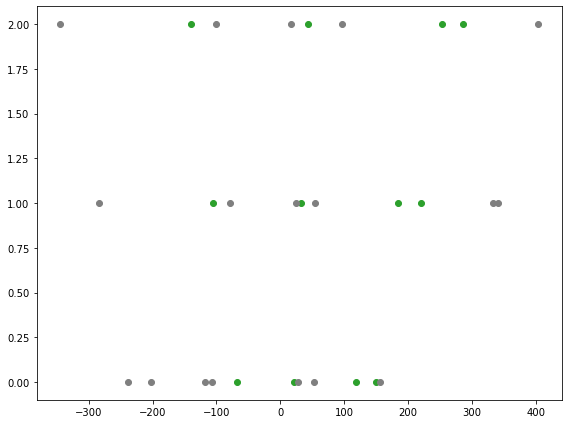

In [39]:
stations = ['z', 'station']
ax = visualize_2d_points(event[event.track != -1], *stations, 'tab:green')
visualize_2d_points(event[event.track == -1],  *stations, 'tab:gray', show=True, ax_in=ax)

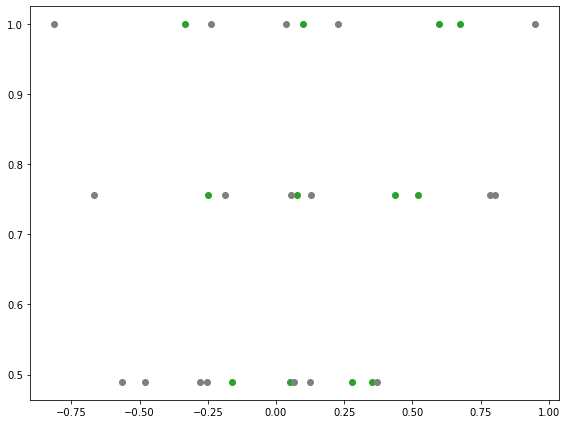

In [30]:
event_norm = transformer(event.copy())
stations = ['z', 'r']
ax = visualize_2d_points(event_norm[event_norm.track != -1], *stations, 'tab:green')
visualize_2d_points(event_norm[event_norm.track == -1], *stations, 'tab:gray', show=True, ax_in=ax)

In [40]:
event_norm

,event,z,station,track,px,py,pz,X0,Y0,Z0,r,phi
0,0,-0.277214,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,3.096103
1,0,0.125174,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,3.096103
2,0,-0.563004,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
3,0,0.066220,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
4,0,0.369045,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
5,0,-0.478618,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-0.515003
6,0,-0.251783,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-0.515003
7,0,0.127482,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756633,0.509282
8,0,-0.187956,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756632,3.104661
9,0,0.056791,1,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.756633,-1.914909


# model

In [278]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.utils.data
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F

class STN3d(nn.Module):
    def __init__(self):
        super(STN3d, self).__init__()
        self.conv1 = torch.nn.Conv1d(3, 64, 1)
        self.conv2 = torch.nn.Conv1d(64, 128, 1)
        self.conv3 = torch.nn.Conv1d(128, 1024, 1)
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 9)
        self.relu = nn.ReLU()

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)


    def forward(self, x):
        batchsize = x.size()[0]
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = torch.max(x, 2, keepdim=True)[0]
        x = x.view(-1, 1024)

        x = F.relu(self.bn4(self.fc1(x)))
        x = F.relu(self.bn5(self.fc2(x)))
        x = self.fc3(x)

        iden = Variable(torch.from_numpy(np.array([1,0,0,0,1,0,0,0,1]).astype(np.float32))).view(1,9).repeat(batchsize,1)
        if x.is_cuda:
            iden = iden.cuda()
        x = x + iden
        x = x.view(-1, 3, 3)
        return x


class STNkd(nn.Module):
    def __init__(self, k=64):
        super(STNkd, self).__init__()
        self.conv1 = torch.nn.Conv1d(k, 64, 1)
        self.conv2 = torch.nn.Conv1d(64, 128, 1)
        self.conv3 = torch.nn.Conv1d(128, 1024, 1)
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, k*k)
        self.relu = nn.ReLU()

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
        self.bn4 = nn.BatchNorm1d(512)
        self.bn5 = nn.BatchNorm1d(256)

        self.k = k

    def forward(self, x):
        batchsize = x.size()[0]
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = torch.max(x, 2, keepdim=True)[0]
        x = x.view(-1, 1024)

        x = F.relu(self.bn4(self.fc1(x)))
        x = F.relu(self.bn5(self.fc2(x)))
        x = self.fc3(x)

        iden = Variable(torch.from_numpy(np.eye(self.k).flatten().astype(np.float32))).view(1,self.k*self.k).repeat(batchsize,1)
        if x.is_cuda:
            iden = iden.cuda()
        x = x + iden
        x = x.view(-1, self.k, self.k)
        return x

class PointNetfeat(nn.Module):
    def __init__(self, global_feat = True, feature_transform = False):
        super(PointNetfeat, self).__init__()
        self.stn = STN3d()
        self.conv1 = torch.nn.Conv1d(3, 64, 1)
        self.conv2 = torch.nn.Conv1d(64, 128, 1)
        self.conv3 = torch.nn.Conv1d(128, 1024, 1)
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
        self.global_feat = global_feat
        self.feature_transform = feature_transform
        if self.feature_transform:
            self.fstn = STNkd(k=64)

    def forward(self, x):
        n_pts = x.size()[2]
        trans = self.stn(x)
        x = x.transpose(2, 1)
        x = torch.bmm(x, trans)
        x = x.transpose(2, 1)
        x = F.relu(self.bn1(self.conv1(x)))

        if self.feature_transform:
            trans_feat = self.fstn(x)
            x = x.transpose(2,1)
            x = torch.bmm(x, trans_feat)
            x = x.transpose(2,1)
        else:
            trans_feat = None

        pointfeat = x
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x))
        x = torch.max(x, 2, keepdim=True)[0]
        x = x.view(-1, 1024)
        if self.global_feat:
            return x, trans, trans_feat
        else:
            x = x.view(-1, 1024, 1).repeat(1, 1, n_pts)
            return torch.cat([x, pointfeat], 1), trans, trans_feat

class PointNetDenseCls(nn.Module):
    def __init__(self, feature_transform=False):
        super(PointNetDenseCls, self).__init__()
        self.feature_transform=feature_transform
        self.feat = PointNetfeat(global_feat=False, feature_transform=feature_transform)
        self.conv1 = torch.nn.Conv1d(1088, 512, 1)
        self.conv2 = torch.nn.Conv1d(512, 256, 1)
        self.conv3 = torch.nn.Conv1d(256, 128, 1)
        self.conv4 = torch.nn.Conv1d(128,1, 1)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.bn3 = nn.BatchNorm1d(128)

    def forward(self, x):
        batchsize = x.size()[0]
        n_pts = x.size()[2]
        x, trans, trans_feat = self.feat(x)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.conv4(x)
        x = x.transpose(2,1).contiguous()
        return F.sigmoid(x).squeeze(-1)

#class PointNetCls(nn.Module):
#    def __init__(self, feature_transform=False):
#        super(PointNetCls, self).__init__()
#        self.feature_transform = feature_transform
#        self.feat = PointNetfeat(global_feat=True, feature_transform=feature_transform)
#        self.fc1 = nn.Linear(1024, 512)
#        self.fc2 = nn.Linear(512, 256)
#        self.fc3 = nn.Linear(256, 1)
#        self.dropout = nn.Dropout(p=0.3)
#        self.bn1 = nn.BatchNorm1d(512)
#        self.bn2 = nn.BatchNorm1d(256)
#        self.relu = nn.ReLU()
#
#    def forward(self, x):
#        x, trans, trans_feat = self.feat(x)
#        x = F.relu(self.bn1(self.fc1(x)))
#        x = F.relu(self.bn2(self.dropout(self.fc2(x))))
#        x = self.fc3(x)
#        return F.sigmoid(x)

In [279]:
batch = event_norm[['r', 'phi', 'z']].values.reshape(1, 3, -1)
batch.shape


(1, 3, 30)

In [280]:
sim_data = torch.tensor(batch).float()
sim_data

tensor([[[ 0.4895,  3.0961, -0.2772,  0.4895,  3.0961,  0.1252,  0.4895,
          -1.9223, -0.5630,  0.4895, -1.9223,  0.0662,  0.4895, -1.9223,
           0.3690,  0.4895, -0.5150, -0.4786,  0.4895, -0.5150, -0.2518,
           0.7566,  0.5093,  0.1275,  0.7566,  3.1047, -0.1880,  0.7566,
          -1.9149,  0.0568],
         [ 0.7566, -1.9149,  0.8024,  0.7566, -0.5389, -0.6689,  0.7566,
          -0.5389,  0.7847,  0.9997,  0.3747,  0.2259,  0.9997,  3.1178,
          -0.2393,  0.9997, -1.8915,  0.0380,  0.9997, -1.8915,  0.9510,
           0.9997, -0.5566, -0.8128,  0.4895, -1.9223, -0.1606,  0.7566,
          -1.9149, -0.2508],
         [ 0.9997, -1.8915, -0.3321,  0.4895, -0.5150,  0.0510,  0.7566,
          -0.5389,  0.0767,  0.9997, -0.5566,  0.1003,  0.4895,  0.6371,
           0.2784,  0.7566,  0.5093,  0.4351,  0.9997,  0.3747,  0.5959,
           0.4895,  3.0961,  0.3520,  0.7566,  3.1047,  0.5200,  0.9997,
           3.1178,  0.6737]]])

In [281]:
seg = PointNetDenseCls()
seg.eval()
out = seg(sim_data)
print('seg', out.size())
print(out[0])

seg torch.Size([1, 30])
tensor([0.4973, 0.4981, 0.4978, 0.4979, 0.4986, 0.4976, 0.4976, 0.4960, 0.4973,
        0.4973, 0.4961, 0.4978, 0.4980, 0.4965, 0.4979, 0.4977, 0.4967, 0.4970,
        0.4973, 0.4967, 0.4972, 0.4982, 0.4957, 0.4975, 0.4978, 0.4960, 0.4973,
        0.4975, 0.4956, 0.4974], grad_fn=<SelectBackward>)


# trying to pretrain smth

In [311]:
csv_params = {
"sep": '\s+',
#"nrows": 25000,
"encoding": 'utf-8',
"names": ['event',  'x', 'y', 'z', 'station', 'track', 'px', 'py', 'pz', 'X0', 'Y0', 'Z0']
}

ev_count = 20000

events_count_str = f"0..{ev_count}"

events = parse("../data/new_data/1.txt",
               csv_params=csv_params, events_quantity=events_count_str,
               filter_func=lambda df: df[df.track >= -1])
events = next(events)[0]
n_events = ev_count
events_to_analyze = events[events.event < n_events]
events_to_analyze

,event,x,y,z,station,track,px,py,pz,X0,Y0,Z0
0,0,-81.47063,3.708617,-117.40020,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,-81.47063,3.708617,53.01124,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,-28.08190,-76.567780,-238.43200,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,-28.08190,-76.567780,28.04412,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,-28.08190,-76.567780,156.29050,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
890333,19999,-40.48610,-119.376500,-67.16998,1,8,-0.154348,-0.417874,-0.255946,0.889737,-0.231829,0.541278
890334,19999,-58.41146,-155.976500,-89.95011,2,8,-0.154348,-0.417874,-0.255946,0.889737,-0.231829,0.541278
890335,19999,71.41284,-39.388120,51.78798,0,11,0.296555,-0.190566,0.224266,0.889737,-0.231829,0.541278
890336,19999,110.93670,-59.857450,80.06839,1,11,0.296555,-0.190566,0.224266,0.889737,-0.231829,0.541278


In [312]:
events_trans = transformer(events_to_analyze)
events_trans

,event,z,station,track,px,py,pz,X0,Y0,Z0,r,phi
0,0,-0.277214,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,3.096103
1,0,0.125174,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,3.096103
2,0,-0.563004,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
3,0,0.066220,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
4,0,0.369045,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489526,-1.922322
...,...,...,...,...,...,...,...,...,...,...,...,...
890333,19999,-0.158607,1,8,-0.154348,-0.417874,-0.255946,0.889737,-0.231829,0.541278,0.756633,-1.897769
890334,19999,-0.212397,2,8,-0.154348,-0.417874,-0.255946,0.889737,-0.231829,0.541278,0.999730,-1.929119
890335,19999,0.122286,0,11,0.296555,-0.190566,0.224266,0.889737,-0.231829,0.541278,0.489526,-0.504036
890336,19999,0.189063,1,11,0.296555,-0.190566,0.224266,0.889737,-0.231829,0.541278,0.756633,-0.494796


In [313]:
from torch.utils.data import DataLoader
COLS_MATTERS = ['r', 'phi', 'z', 'track']
NORM_COEF = [1., np.pi, 1.]
class PointNetDataset(Dataset):
    def __init__(self, input_df):
        self.df = input_df
        self.indices = input_df.event.unique()

    def __getitem__(self, index):        
        return self.df[self.df.event == self.indices[index]][COLS_MATTERS]

    def __len__(self):
        return len(self.indices) - 1

def collate_fn_pnt(points):
    batch_size = len(points)
    n_feat = 3
    
    #print(len(points[0]))
    cols_feat = ['r', 'phi', 'z']
    cols_tgt = ['track']
    n_dim = np.array([len(p) for p in points])
    #print(n_dim)
    max_dim = n_dim.max()
    batch_inputs = np.zeros((batch_size, n_feat, max_dim), dtype=np.float32)
    batch_targets = np.zeros((batch_size, max_dim), dtype=np.float32)

    for i, p in enumerate(points):
        batch_inputs[i, :, :n_dim[i]] = (p[cols_feat].values / NORM_COEF).T 
       
        batch_targets[i, :n_dim[i]] = (p[cols_tgt]!= -1).values.squeeze(-1).astype(np.float32)

    return torch.from_numpy(batch_inputs), torch.from_numpy(batch_targets)



In [327]:
BATCH_SIZE = 200
dataset = PointNetDataset(events_trans)

    
dataloader = DataLoader(
            dataset=dataset,
            batch_size=BATCH_SIZE,
            collate_fn=collate_fn_pnt, drop_last=True)
def test():
    i = 0
    for inpt, tgt in dataloader:
        for b in range(BATCH_SIZE):
            aa = dataset[i][['r', 'phi', 'z']].values / NORM_COEF
            
            
            bb = inpt[b][:, :len(aa)]
            if not np.allclose(aa.T, bb):                
                print("AAAAAAAAAA:", aa.shape)
                print(aa)
                print("BBBBBBBBBB:")
                print(bb, bb.shape)
                return
            i+=1
    print("YOU OK")
#test()

In [328]:
class GraphNetWeightedBCE(nn.Module):
    """Weighted binary cross entropy for RDGraphNet"""
    def __init__(self, real_weight, fake_weight):
        super().__init__()
        self.real_weight = real_weight
        self.fake_weight = fake_weight

    def forward(self, preds, target):
        # Compute target weights on-the-fly for loss function
        batch_weights_real = target * self.real_weight
        batch_weights_fake = (1 - target) * self.fake_weight
        batch_weights = batch_weights_real + batch_weights_fake
        # compute loss with weights
        return F.binary_cross_entropy(preds, target, weight=batch_weights)

from pytorch_lightning.metrics import functional as metrics

def precision(preds, target):
    return metrics.precision(
        preds > 0.5, target, reduction='none', num_classes=2)[1]

def recall(preds, target):
    return metrics.recall(
        preds > 0.5, target, reduction='none', num_classes=2)[1]

def f1_score(preds, target):
    return metrics.f1_score(
        preds > 0.5, target, reduction='none', num_classes=2)[1]

def accuracy(preds, target):
    return metrics.accuracy(preds > 0.5, target, num_classes=2)



In [329]:
Net = PointNetDenseCls


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

In [ ]:
import sys
model.train()
my_loss = GraphNetWeightedBCE(2, 0.5)

for epoch in range(1000):
    optimizer.zero_grad()
    i = 0
    loss_sum = 0
    
    prec = 0
    rec = 0
    
    for inpt, targets in dataloader:
        preds = model(torch.tensor(inpt).float().to(device)).cpu()
        loss = my_loss(preds, targets)        
        loss.backward()
        loss_sum += loss.item()    
        prec += precision(preds, targets)
        rec  += recall(preds, targets)
        optimizer.step()
        i+=1
        sys.stdout.write("\r epoch %d loss %f prec %f rec %f" % (epoch, loss_sum / i, prec / i, rec / i))
        
    sys.stdout.write("\nepoch %d loss %f prec %f rec %f" % (epoch, loss_sum / i, prec / i, rec / i))



 epoch 0 loss 0.251591 prec 0.230089 rec 0.443533
 epoch 1 loss 0.190664 prec 0.264769 rec 0.971602
 epoch 2 loss 0.188268 prec 0.265548 rec 0.993703
 epoch 3 loss 0.186945 prec 0.267965 rec 0.952774
 epoch 4 loss 0.186898 prec 0.265788 rec 0.995422
 epoch 5 loss 0.185184 prec 0.267976 rec 0.992887
 epoch 6 loss 0.183143 prec 0.272801 rec 0.992751
 epoch 7 loss 0.182060 prec 0.275336 rec 0.987235
 epoch 8 loss 0.186286 prec 0.267569 rec 0.997575
 epoch 9 loss 0.181815 prec 0.278450 rec 0.978865
 epoch 10 loss 0.179829 prec 0.303684 rec 0.894594
 epoch 11 loss 0.172568 prec 0.348490 rec 0.837874
 epoch 12 loss 0.174340 prec 0.353895 rec 0.798379
 epoch 13 loss 0.177399 prec 0.377247 rec 0.765375
 epoch 14 loss 0.166054 prec 0.368094 rec 0.839397
 epoch 15 loss 0.164120 prec 0.371165 rec 0.846925
 epoch 16 loss 0.162176 prec 0.371709 rec 0.868439
 epoch 17 loss 0.163671 prec 0.381388 rec 0.833651
 epoch 18 loss 0.167606 prec 0.370415 rec 0.809748
 epoch 19 loss 0.164311 prec 0.388530 rec

 epoch 159 loss 0.145310 prec 0.407759 rec 0.890883
 epoch 160 loss 0.144532 prec 0.408132 rec 0.889781
 epoch 161 loss 0.144627 prec 0.407618 rec 0.893946
 epoch 162 loss 0.144167 prec 0.414443 rec 0.879058
 epoch 163 loss 0.145316 prec 0.410886 rec 0.881903
 epoch 164 loss 0.144262 prec 0.420734 rec 0.872868
 epoch 165 loss 0.144865 prec 0.407889 rec 0.892075
 epoch 166 loss 0.146689 prec 0.400058 rec 0.897961
 epoch 167 loss 0.147270 prec 0.394263 rec 0.904830
 epoch 168 loss 0.143906 prec 0.407685 rec 0.898423
 epoch 169 loss 0.142985 prec 0.412531 rec 0.893427
 epoch 170 loss 0.144371 prec 0.412551 rec 0.887726
 epoch 171 loss 0.146472 prec 0.398365 rec 0.900221
 epoch 172 loss 0.144003 prec 0.407172 rec 0.898654
 epoch 173 loss 0.143787 prec 0.410483 rec 0.892670
 epoch 174 loss 0.144330 prec 0.409184 rec 0.891991
 epoch 175 loss 0.146145 prec 0.410307 rec 0.881647
 epoch 176 loss 0.145605 prec 0.410102 rec 0.884661
 epoch 177 loss 0.144898 prec 0.410093 rec 0.886607
 epoch 178 l

 epoch 316 loss 0.143697 prec 0.414127 rec 0.886358
 epoch 317 loss 0.141976 prec 0.419543 rec 0.883039
 epoch 318 loss 0.142422 prec 0.419803 rec 0.881974
 epoch 319 loss 0.143904 prec 0.408622 rec 0.893079
 epoch 320 loss 0.145116 prec 0.412155 rec 0.880268
 epoch 321 loss 0.143182 prec 0.414206 rec 0.885279
 epoch 322 loss 0.144495 prec 0.410473 rec 0.879925
 epoch 323 loss 0.142958 prec 0.412975 rec 0.890787
 epoch 324 loss 0.143502 prec 0.419589 rec 0.879428
 epoch 325 loss 0.142633 prec 0.414265 rec 0.890433
 epoch 326 loss 0.141779 prec 0.420573 rec 0.882816
 epoch 327 loss 0.142575 prec 0.420039 rec 0.879880
 epoch 328 loss 0.143031 prec 0.419650 rec 0.879217
 epoch 329 loss 0.142737 prec 0.419084 rec 0.880687
 epoch 330 loss 0.143618 prec 0.426238 rec 0.864345
 epoch 331 loss 0.142909 prec 0.414530 rec 0.887984
 epoch 332 loss 0.143215 prec 0.417595 rec 0.882062
 epoch 333 loss 0.143726 prec 0.414945 rec 0.883572
 epoch 334 loss 0.144214 prec 0.402960 rec 0.903553
 epoch 335 l